In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##this routine is provided along with the textbook
def rk2(y0, t0, tf, dt, deriv_func):
    """
    Numerically integrate m first order ODEs using the Runga-Kutta 
      second-order method, where m is an integer greater than zero.

    Input
    ----------
    y0:         Array of m initial dependent-variable values
    t0, tf:     Initial and Final independent-variable values
    dt:         Step size for the independent variable
    deriv_func: Function to be numerically integrated

    Output
    ----------
    t:          Array of independent-variable values, one entry for each step
    y:          Array of corresponding dependent-variables values, 
                  first index is step number, 
                  second index is dependent-variable number
    """

    t = np.arange(t0, tf+dt, dt) # starts at t0 and makes steps of size dt
    n_steps = len(t)             # number of steps to get to tf
    m = len(y0)                  # number of dependent variables
    y = np.zeros((n_steps, m))   # create an array to put answers into
    y[0,:] = y0                  # initial condition

    for n in range(n_steps-1):
        # Take a half step
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f

        # Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = y[n,:] + dt*f_star
        
    return t, y

In [4]:
#define constants:
m1 = 1 #kg
m2 = 1 #kg
k1 = 4.0 #N/m
k2 = 0.5 #N/m

#define our diff equation
# x1" = (-(k1+k2)x1 + k2x2 - bx1')/m1
# x2" = (-(k1+k2)x2 + k2x1 - 2bx2')/m2
def function(y, t):
    f0 = y[1]
    f1 = ((-1*(k1+k2)*y[0] + k2*y[2] - b*y[1])/m1)
    f2 = y[3]
    f3 = ((-1*(k1+k2)*y[2] + k2*y[0] - 2*b*y[3])/m2)
    return np.array([f0,f1,f2,f3])
           

# Part a:

In [67]:
#for part a: air resistance = 0
b = 0

In [68]:
#feeding the initial conditions, then starting t, ending t, stepsize, function
#initial conditions: x1(0)=1, x2(0)=0, x1'(0)=x2'(0)=0
t1, y1 = rk2( [1.0,0.0,0.0,0.0], 0, 50.0, 0.0001, function) 


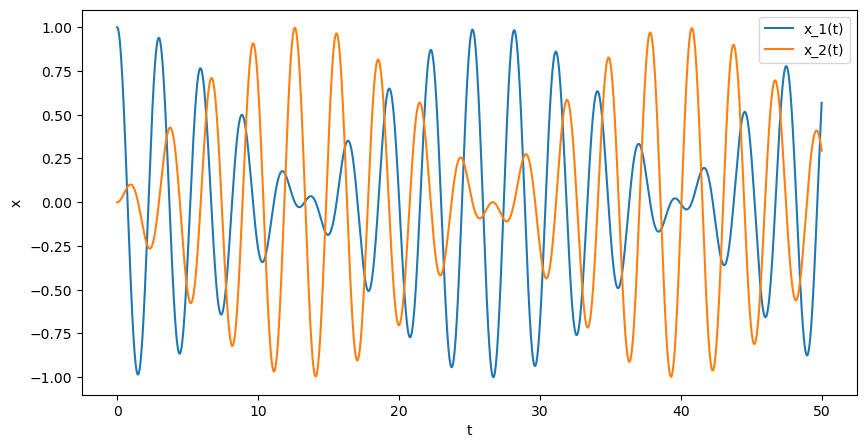

In [69]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(t1,y1[:,0], label="x_1(t)")
plt.plot(t1,y1[:,2], label="x_2(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

# Part b:

In [21]:
#in part be, air resistance is NOT 0
#instead, find b that makes mass 2 move less than +-0.01 after 30 seconds

To find the b value that makes mass 2 "motionless" after 30 seconds, I iterated through different b values (0.1<b<0.2 with step size 0.01) and graphed out the resulting x2 motion. Then, I found at which b value the oscillations for mass 2 were less than +- 0.01 after 30 seconds (where the blue oscillations were between the 0.01 and -0.01 green lines on the graph). 

Using this method, I initially found that b = 0.17 was the smallest b value for which mass 2's oscillations were within 0.01 m from the relaxed position of 0. Then, I iterated through a more narrow scope with smaller variations (0.16<b<0.17 with step size of 0.0025). This time, I found the smallest b value to give oscillations less tha 0.01 was b = 0.165

Finally, I iterated through one more narrower scope (0.1625<b<0.1650 with step size of 0.0005). This final time, I found that **b = 0.164** is the smallest b for which the oscillations or mass 2 are less than 0.01 m from the relaxed position of 0.

In [61]:
#You don't need to actually run the code below. It is very slow and just graphs out the results described above:

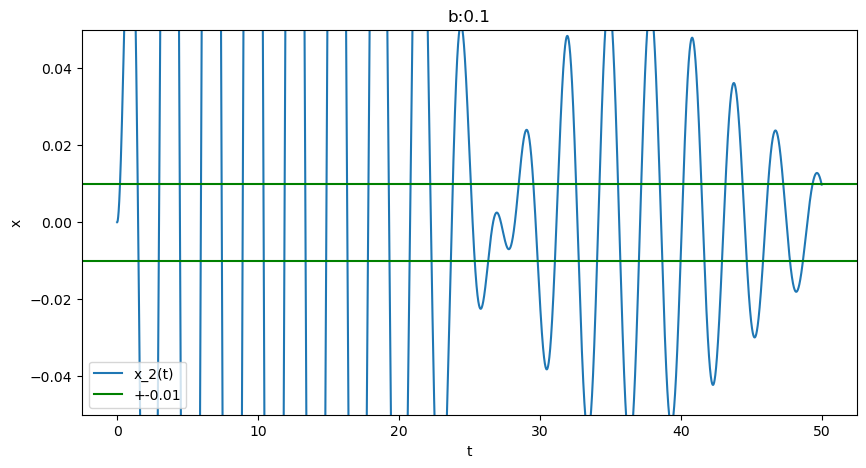

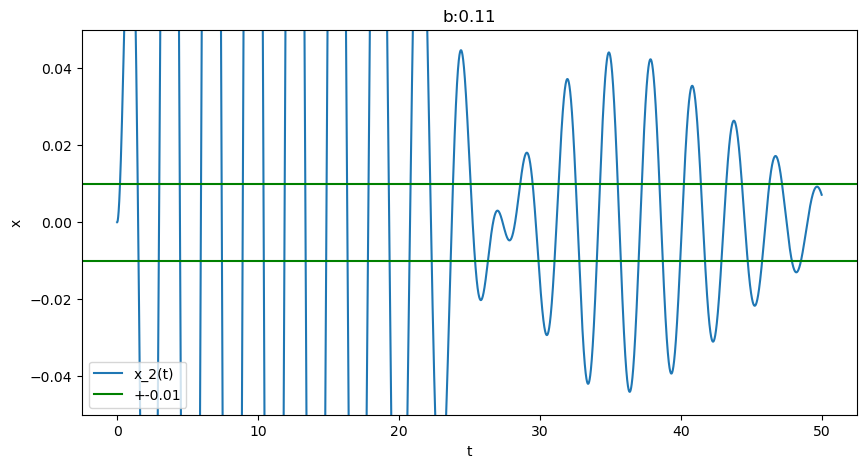

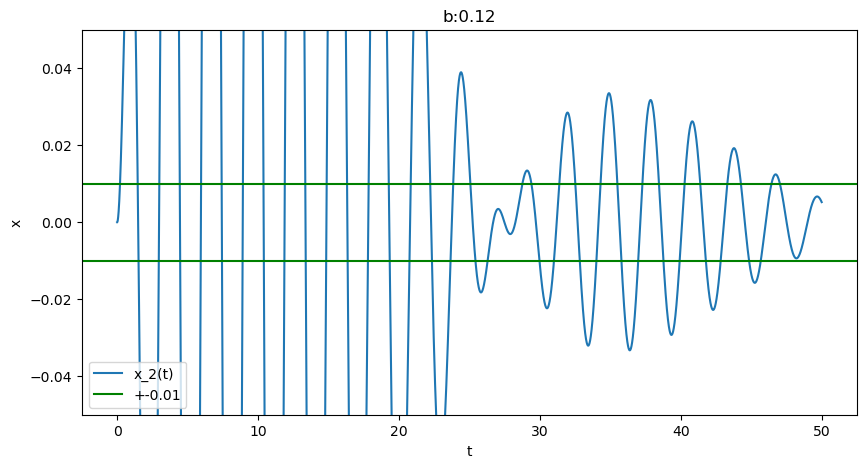

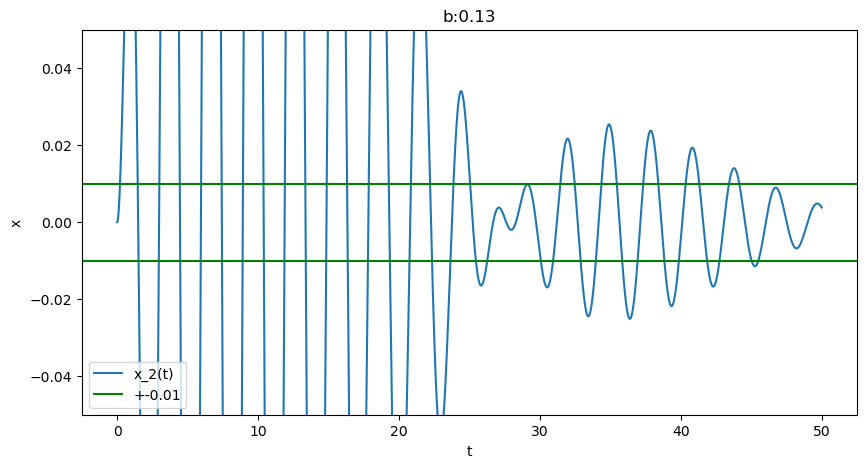

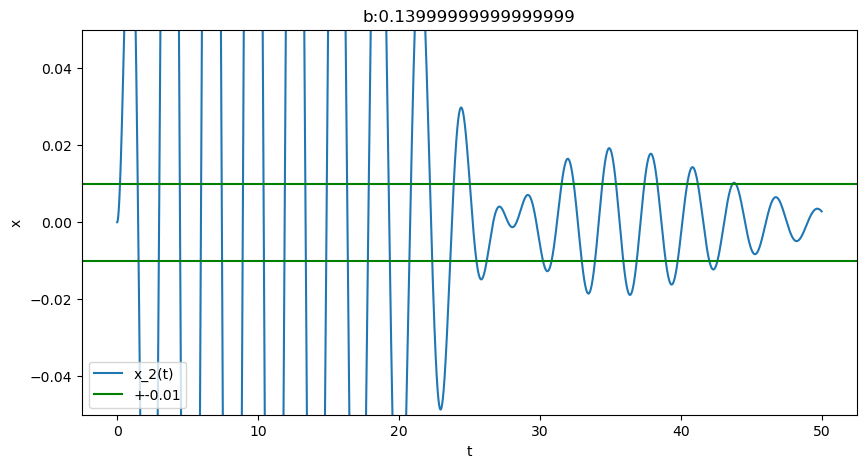

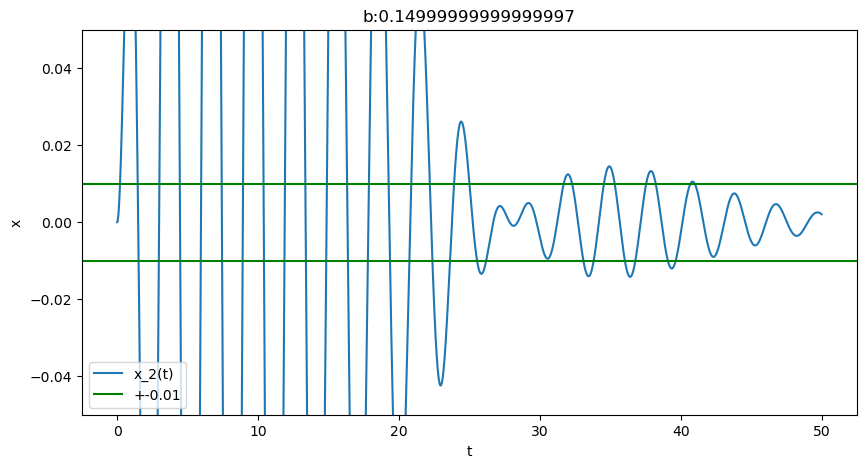

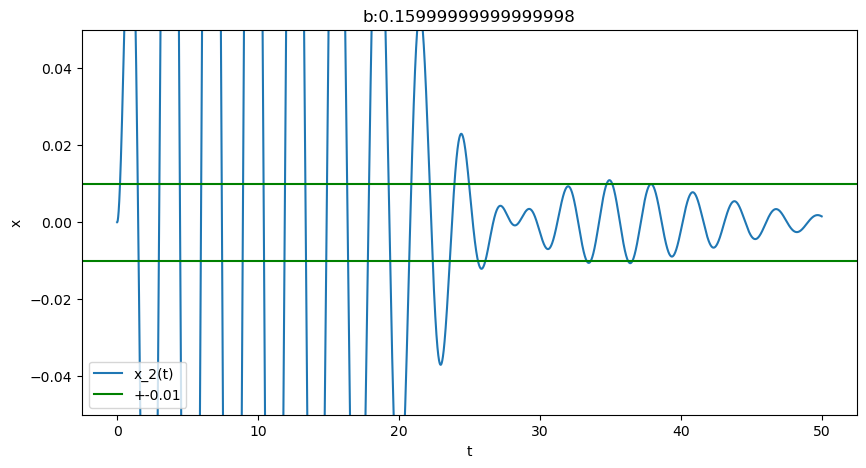

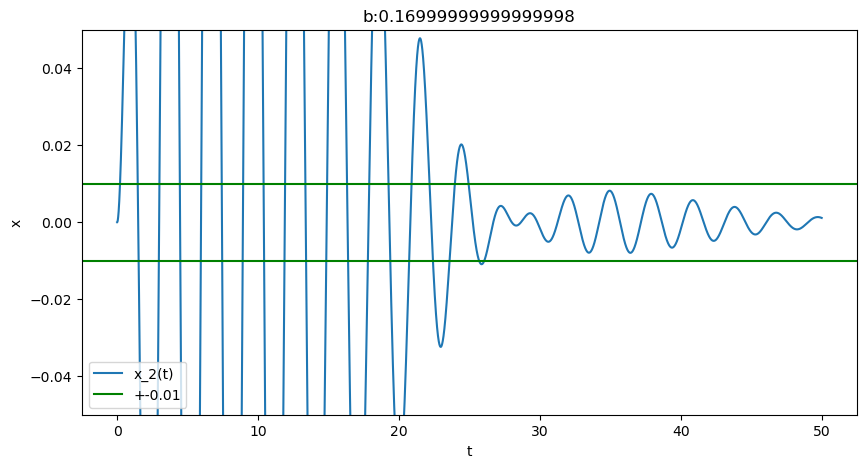

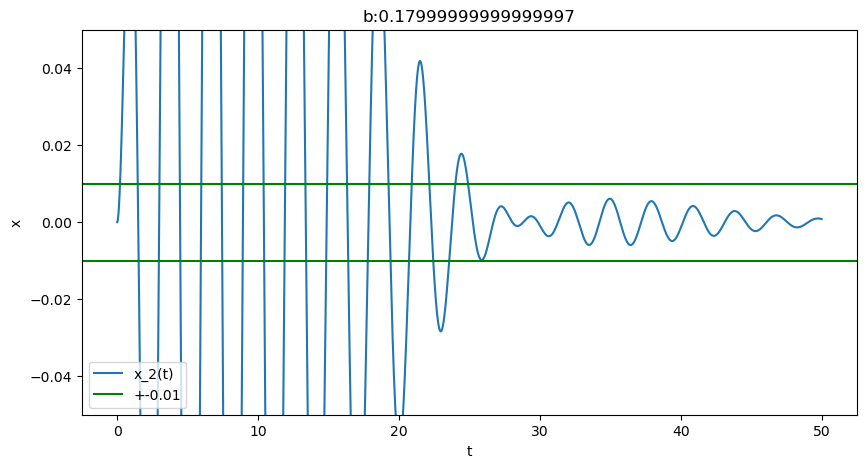

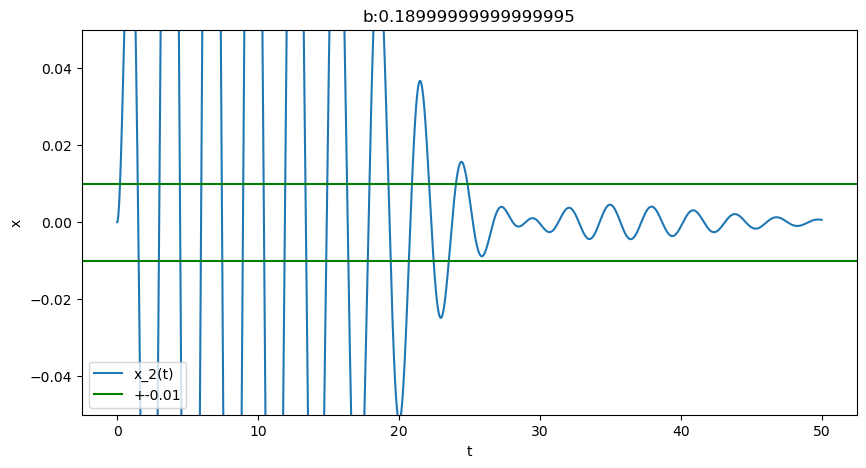

In [62]:
bss = np.arange(0.1,0.2,0.01)

for i in bss:
    b = i
    t1, y1 = rk2( [1,0,0,0], 0, 50.0, 0.0001, function) 
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.plot(t1,y1[:,2], label="x_2(t)")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.axhline(y=0.01, color="green", label="+-0.01")
    plt.axhline(y=-0.01, color="green")
    plt.title("b:" + str(i))
    plt.ylim(-0.05,0.05)
    plt.legend(loc="lower left")
    plt.show()

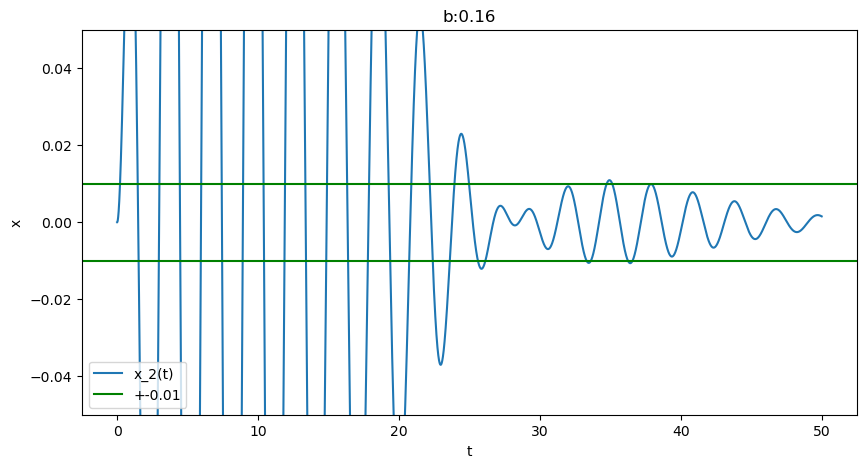

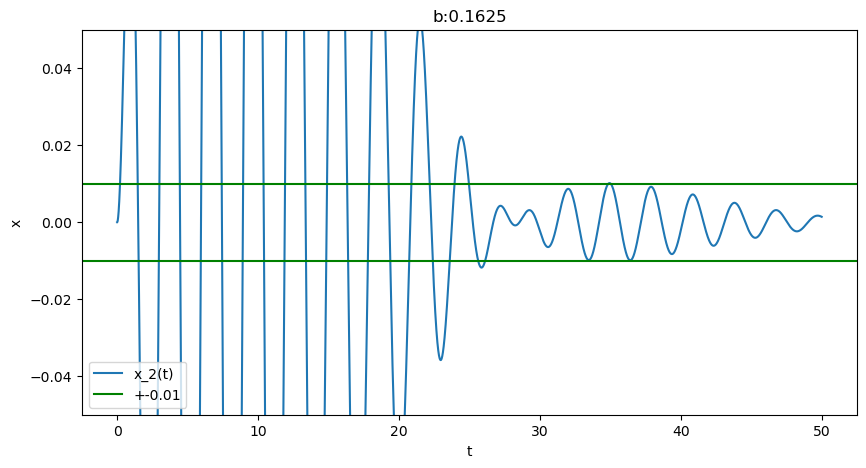

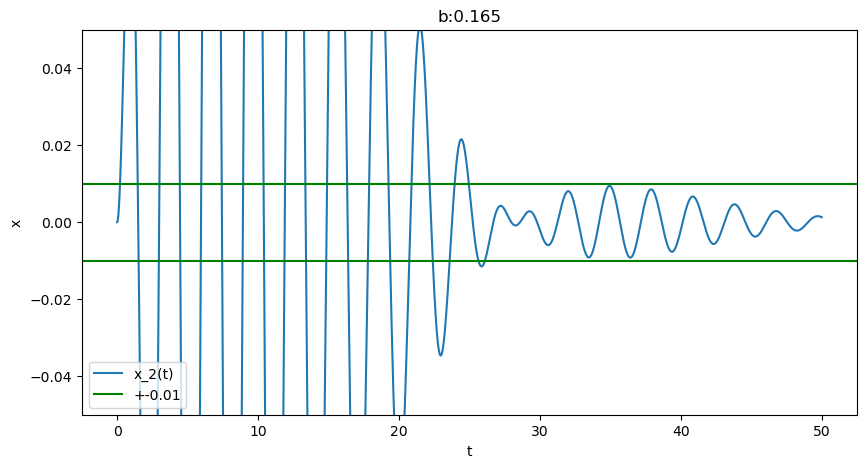

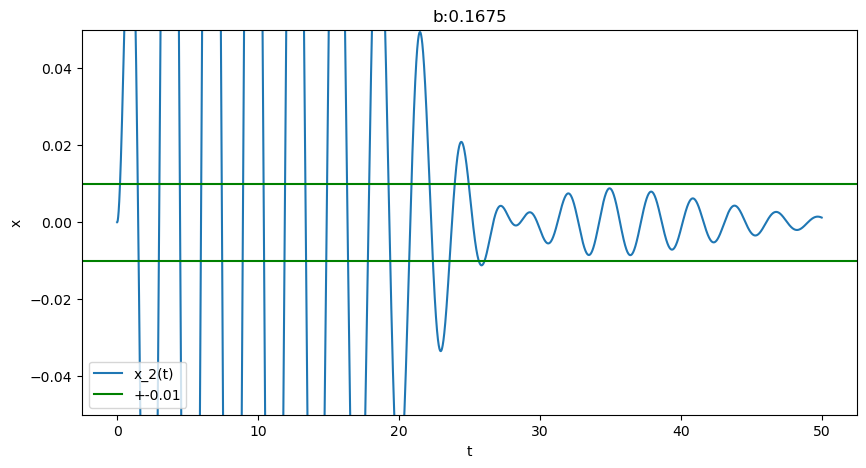

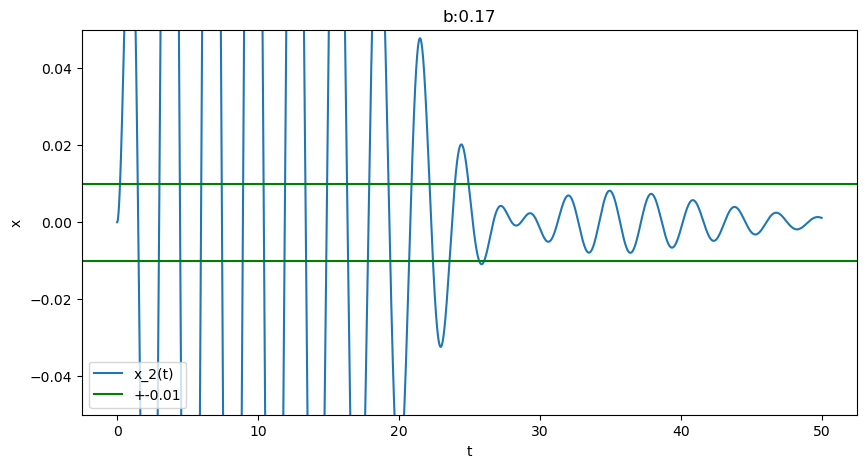

In [63]:
bss = np.arange(0.16,0.17,0.0025)

for i in bss:
    b = i
    t1, y1 = rk2( [1,0,0,0], 0, 50.0, 0.0001, function) 
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.plot(t1,y1[:,2], label="x_2(t)")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.axhline(y=0.01, color="green", label="+-0.01")
    plt.axhline(y=-0.01, color="green")
    plt.title("b:" + str(i))
    plt.ylim(-0.05,0.05)
    plt.legend(loc="lower left")
    plt.show()

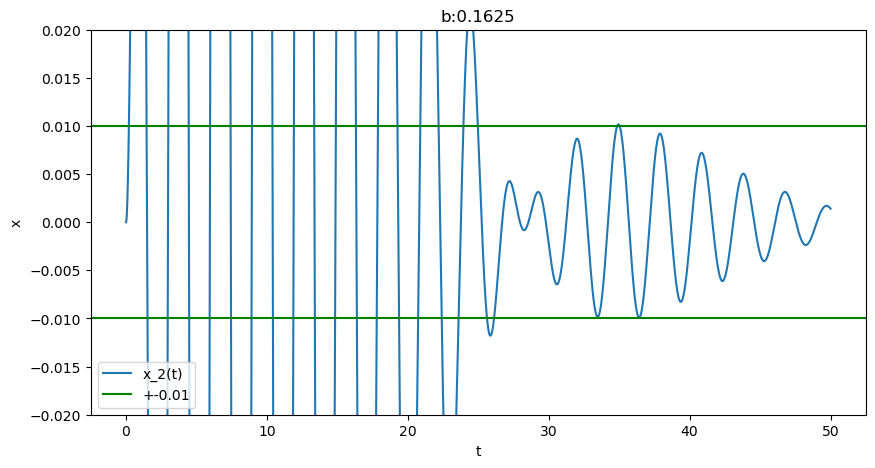

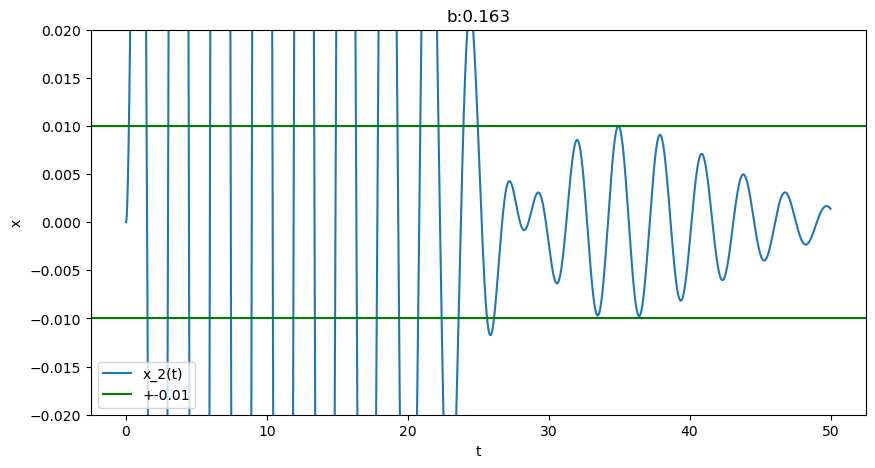

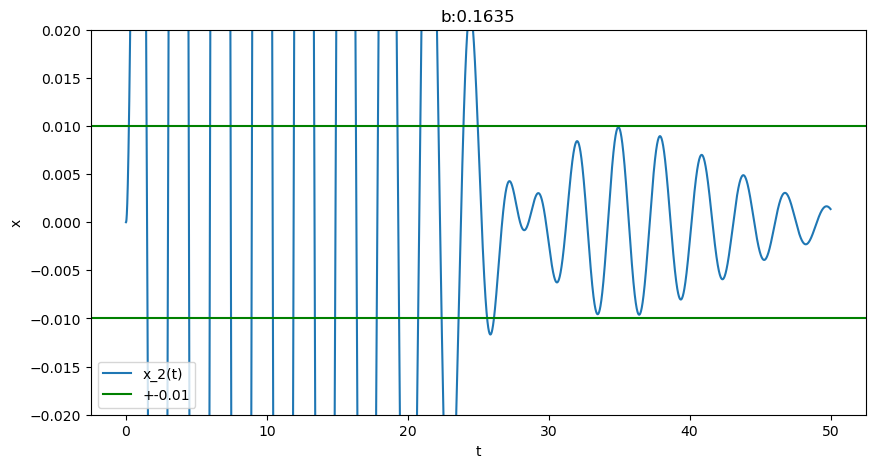

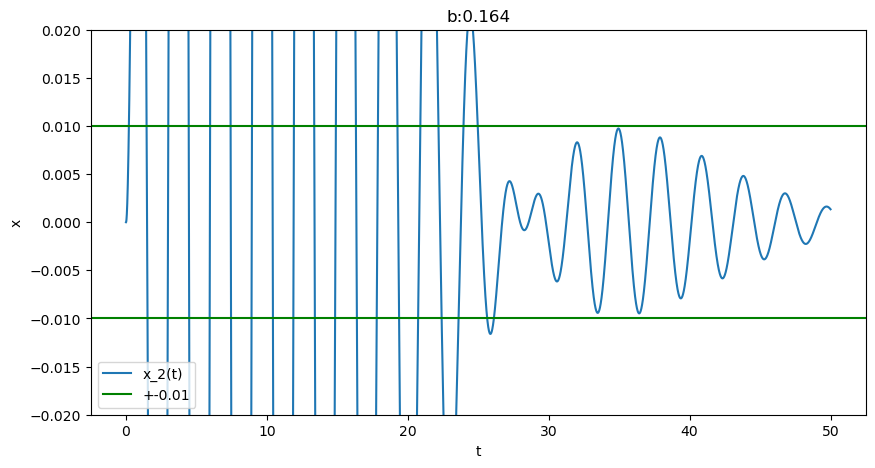

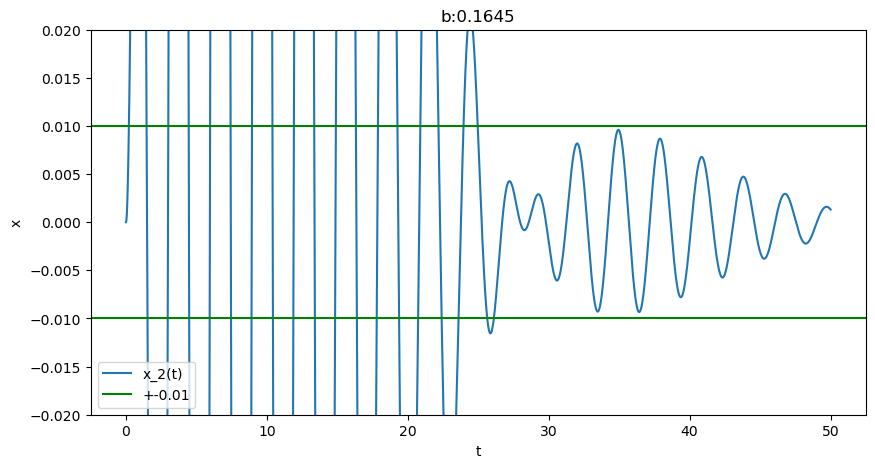

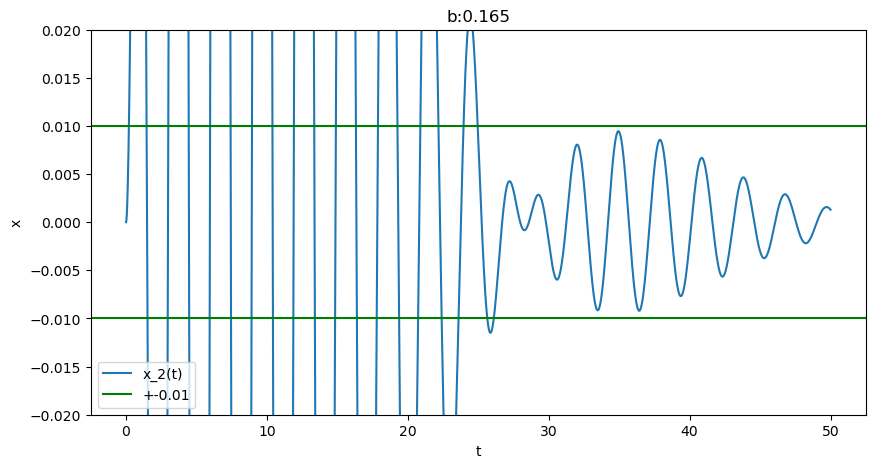

In [64]:
bss = np.arange(0.1625,0.165,0.0005)

for i in bss:
    b = i
    t1, y1 = rk2( [1,0,0,0], 0, 50.0, 0.0001, function) 
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.plot(t1,y1[:,2], label="x_2(t)")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.axhline(y=0.01, color="green", label="+-0.01")
    plt.axhline(y=-0.01, color="green")
    plt.title("b:" + str(i))
    plt.ylim(-0.02,0.02)
    plt.legend(loc="lower left")
    plt.show()

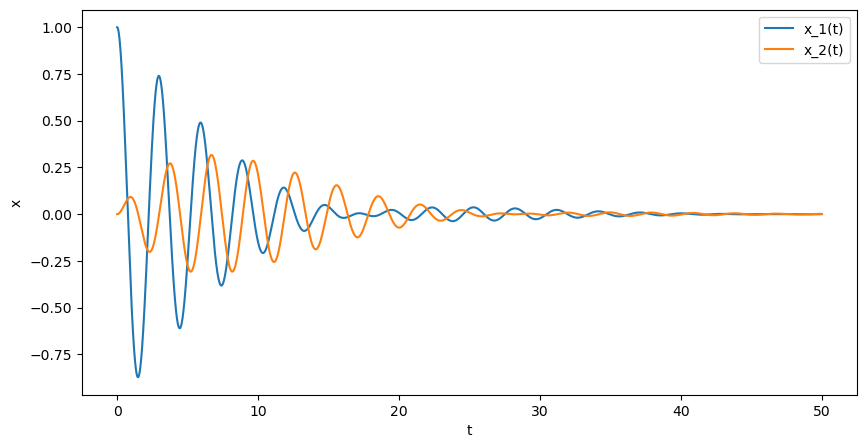

In [70]:
b=0.164
t2, y2 = rk2( [1.0,0.0,0.0,0.0], 0, 50.0, 0.0001, function) 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(t2,y2[:,0], label="x_1(t)")
plt.plot(t2,y2[:,2], label="x_2(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()